# Exploratory Data Analysis with Pandas

Dataset used:
* https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv
* https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv

Objectives:
* Finding and handling missing values
* Simple EDA
* Time Series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")

In [3]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [4]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [13]:
print(df.isna().sum())  # find number of missing values per column

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64


In [9]:
print(df.notna().sum())  # find number of non-missing values per column

PID             8
ST_NUM          7
ST_NAME         9
OWN_OCCUPIED    8
NUM_BEDROOMS    7
NUM_BATH        8
SQ_FT           8
dtype: int64


In [143]:
missing_values = ["na", "--", "n/a", "NA"]
df = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
    na_values=missing_values
)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [144]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [145]:
print(df["OWN_OCCUPIED"].unique())

['Y' 'N' '12' nan]


In [146]:
type("12"), type(int("12")), int("Y")

ValueError: invalid literal for int() with base 10: 'Y'

In [147]:
df.loc[4, "OWN_OCCUPIED"]

'Y'

In [148]:
for idx, value in enumerate(df["OWN_OCCUPIED"]):
    try:
        int(value)
        df.loc[idx, "OWN_OCCUPIED"] = np.nan
    except:
        continue

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [149]:
for idx, value in enumerate(df["NUM_BATH"]):
    try:
        float(value)
        df.loc[idx, "NUM_BATH"] = int(float(value))
    except:
        df.loc[idx, "NUM_BATH"] = np.nan

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [122]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [150]:
df.loc[df["ST_NUM"].isna()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0


In [151]:
df.loc[~df["ST_NUM"].isna()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1,NaN
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [152]:
# df["ST_NUM"].fillna(df["ST_NUM"].mean(), inplace=True)
df["ST_NUM"] = df["ST_NUM"].fillna(df["ST_NUM"].mean())

In [154]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,1,NaN
2,100003000.0,191.428571,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,NaN,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.000000,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.000000,TREMONT,Y,NaN,2,1800.0


In [155]:
df.loc[df["ST_NUM"].isna()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT


In [162]:
df["NUM_BATH"] = df["NUM_BATH"].fillna(df["NUM_BATH"].median())
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,1.0,NaN
2,100003000.0,191.428571,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.000000,BERKELEY,Y,1.0,1.0,700.0
4,100005000.0,203.000000,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.000000,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.428571,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.000000,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.000000,TREMONT,Y,3.0,2.0,1800.0


In [163]:
df = df.fillna(
    {
        "OWN_OCCUPIED": df["OWN_OCCUPIED"].mode()[0],
        "NUM_BEDROOMS": df["NUM_BEDROOMS"].median(),
        "SQ_FT": df["SQ_FT"].mean()
    }
)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,1.0,1100.0
2,100003000.0,191.428571,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.000000,BERKELEY,Y,1.0,1.0,700.0
4,100005000.0,203.000000,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.000000,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.428571,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.000000,TREMONT,Y,3.0,1.0,1100.0
8,100009000.0,215.000000,TREMONT,Y,3.0,2.0,1800.0


In [160]:
df["PID"].fillna(100005000, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,1.0,NaN
2,100003000.0,191.428571,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.000000,BERKELEY,Y,1.0,1.0,700.0
4,100005000.0,203.000000,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.000000,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,191.428571,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.000000,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.000000,TREMONT,Y,3.0,2.0,1800.0


In [168]:
df.isna().sum().sum()

0

In [169]:
df_obes = pd.read_excel("data/obes.xls", sheet_name="7.2", skiprows=4, skipfooter=14)
df_obes.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [170]:
df_obes.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [174]:
df_obes.dropna(inplace=True)
df_obes.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [179]:
df_obes.set_index("Year", inplace=True)
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [183]:
df_obes.loc[["2002/03", "2003/04", "2011/12", "2012/13"]]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


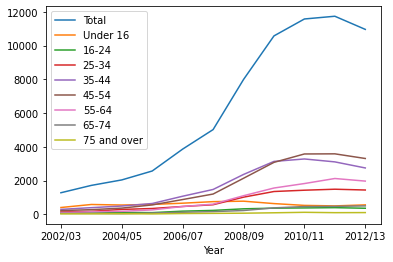

In [185]:
df_obes.plot()
plt.show()

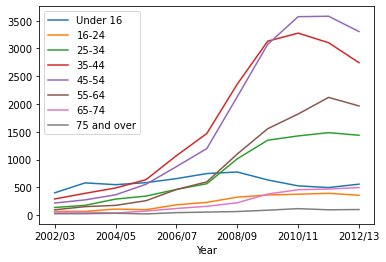

In [186]:
df_obes_no_total = df_obes.drop(columns="Total")
df_obes_no_total.plot()
plt.show()

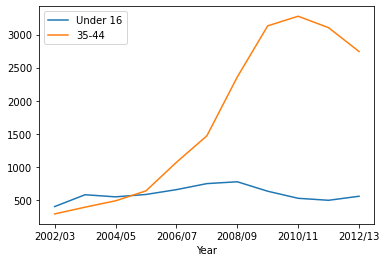

In [189]:
df_obes["Under 16"].plot(label="Under 16")
df_obes["35-44"].plot(label="35-44")
plt.legend()
plt.show()

In [190]:
df_daily = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv")
df_daily.shape

(4383, 5)

In [191]:
df_daily.head(10)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
5,2006-01-06,1403.427,NaN,NaN,NaN
6,2006-01-07,1300.287,NaN,NaN,NaN
7,2006-01-08,1207.985,NaN,NaN,NaN
8,2006-01-09,1529.323,NaN,NaN,NaN
9,2006-01-10,1576.911,NaN,NaN,NaN


In [192]:
df_daily.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [194]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [196]:
df_daily["Date"]

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, Length: 4383, dtype: object

In [197]:
df_daily["Date"] = pd.to_datetime(df_daily["Date"])

In [198]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [200]:
df_daily.set_index("Date", inplace=True)

In [201]:
df_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [209]:
df_daily.loc["2006-01-15"]

Consumption    1265.475
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Name: 2006-01-15 00:00:00, dtype: float64

In [208]:
df_daily.head(15)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [213]:
df_daily.loc["2006-01-15"]

Consumption    1265.475
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Name: 2006-01-15 00:00:00, dtype: float64

In [204]:
df_daily.loc[["2006-01-15", "2006-02-15"]]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-15,1265.475,NaN,NaN,NaN
2006-02-15,1562.656,NaN,NaN,NaN


In [212]:
df_daily.loc["2006-02-01":"2006-02-28"]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-02-01,1582.134,NaN,NaN,NaN
2006-02-02,1595.717,NaN,NaN,NaN
2006-02-03,1577.786,NaN,NaN,NaN
2006-02-04,1366.322,NaN,NaN,NaN
2006-02-05,1258.013,NaN,NaN,NaN
2006-02-06,1557.525,NaN,NaN,NaN
2006-02-07,1606.667,NaN,NaN,NaN
2006-02-08,1590.896,NaN,NaN,NaN
2006-02-09,1599.129,NaN,NaN,NaN
